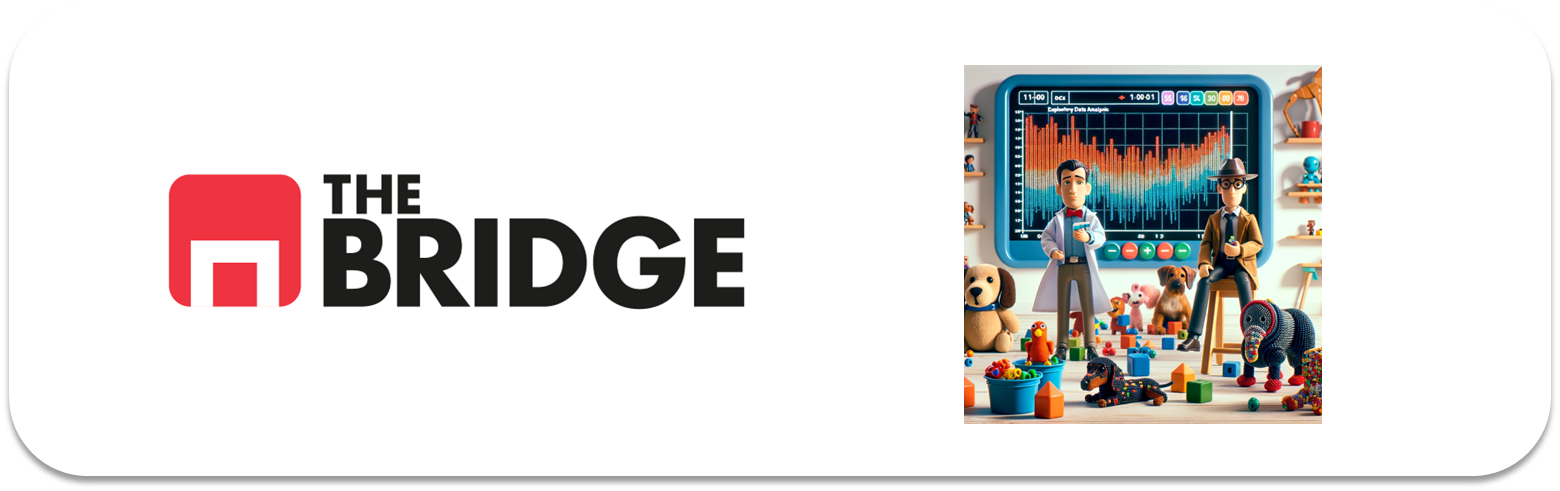

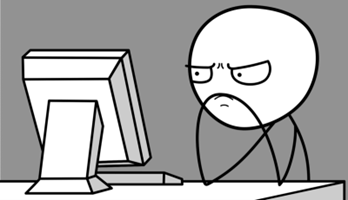

Para ejercitarte y afianzar lo aprendido sobre el estudio estadístico de las relaciones entre variables, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [19]:
import pandas as pd
import scipy.stats

import bootcampviztools as viz
import datascience as ds

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
admisiones = pd.read_csv('./data/admission_data.csv',
                         index_col=0)
admisiones.drop(columns=['Year'], inplace=True)
admisiones

,Major,Gender,Admission
0,School of Medicine,F,Rejected
1,Department of Economics,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected
...,...,...,...
12758,Other,M,Accepted
12759,Department of Mechanical Engineering,M,Accepted
12760,Other,F,Rejected
12761,Other,M,Rejected


### Ejercicio 2

Si recuerdas, las variables "Admission" y "Major" parecían tener una relación clara (la distribución de ratio de admisión variaba claramente entre departamentos o "Majors"). Utiliza el estadístico adecuado (para variables categóricas entre sí, Chi-2) para comprobar que esa hipótesis de relación es estadísticamente significativa, tal y como lo hemos hecho en el workout

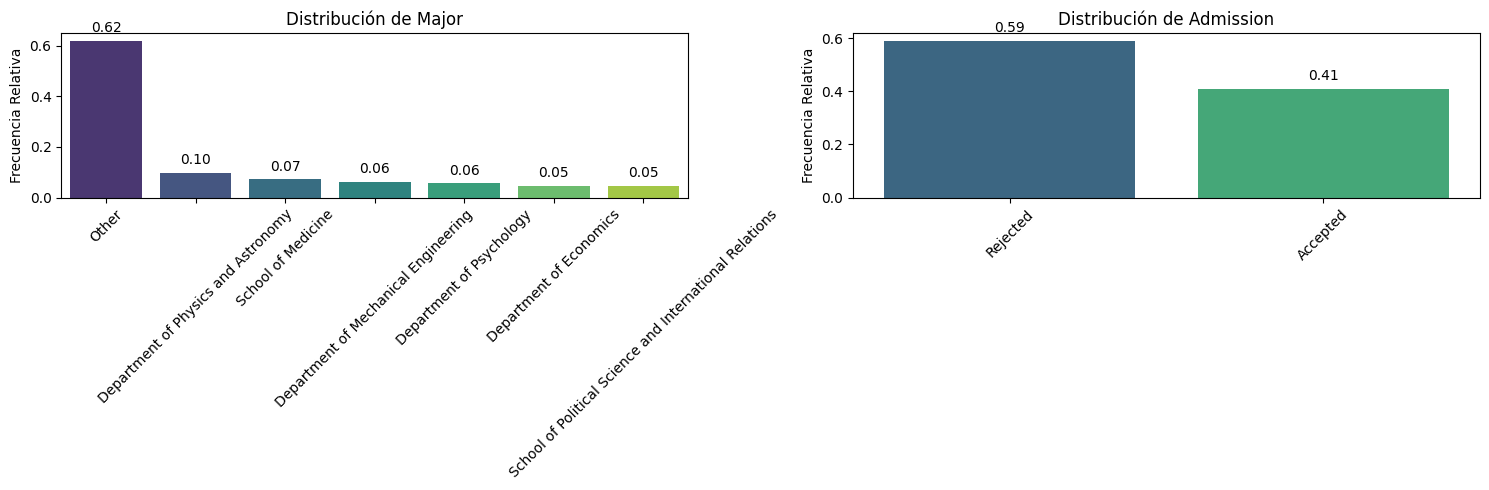

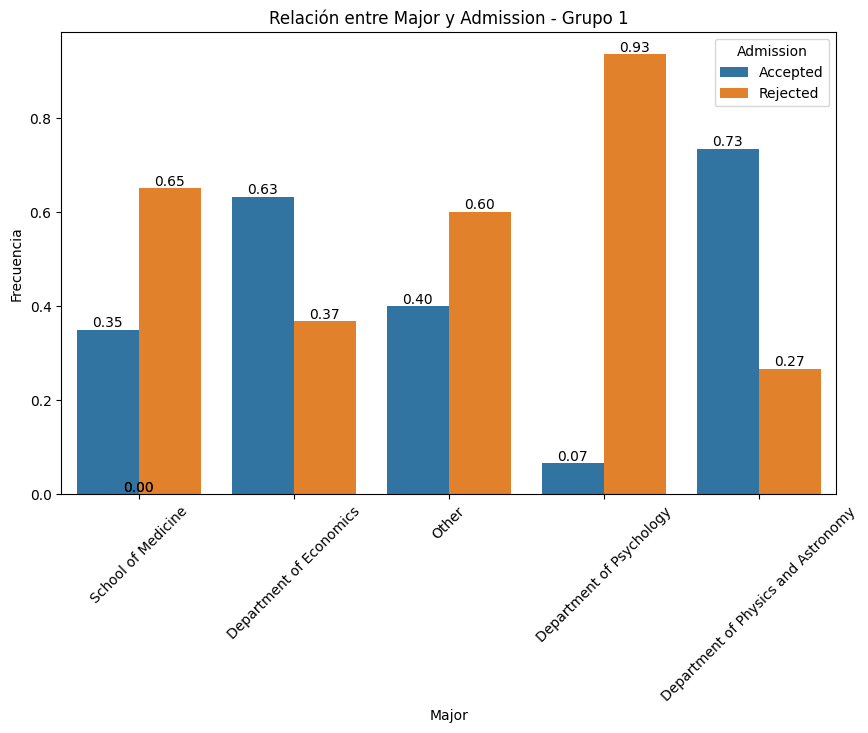

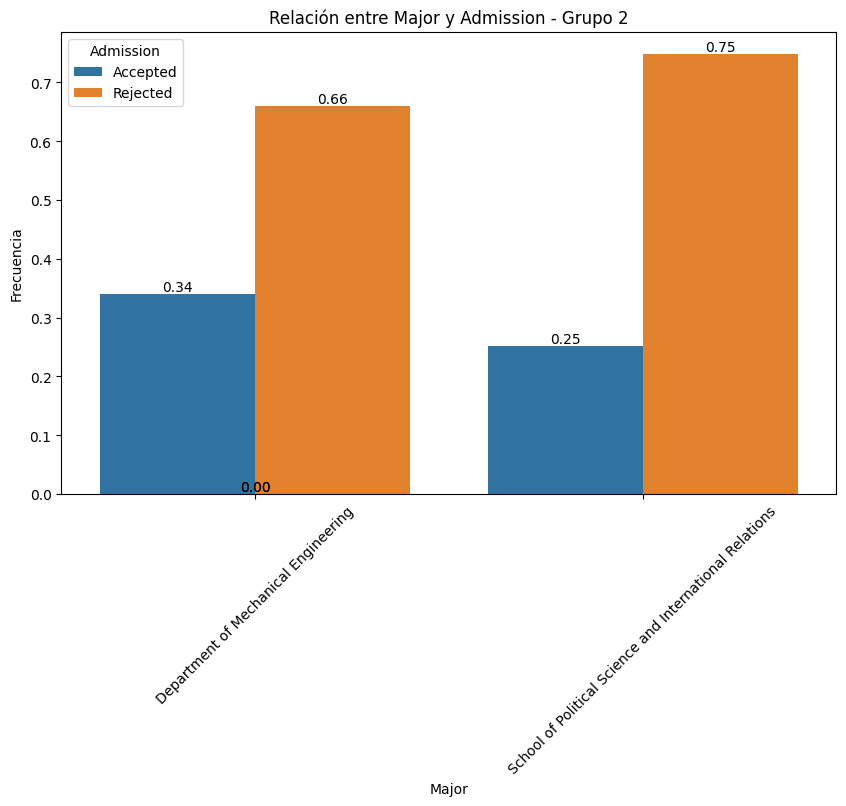

In [4]:
# Primero ver sus frecuencias individuales
viz.pinta_distribucion_categoricas(admisiones, ['Major', 'Admission'], relativa=True)

# Segundo recordar su relación
viz.plot_categorical_relationship_fin(admisiones, "Major", "Admission", relative_freq=True)

In [8]:
# Obtener la tabla de contingencia
tabla_contingencia = pd.crosstab(admisiones['Major'], admisiones['Admission'])
tabla_contingencia

Admission,Accepted,Rejected
Major,,
Department of Economics,370,215
Department of Mechanical Engineering,269,523
Department of Physics and Astronomy,914,332
Department of Psychology,47,667
Other,3164,4760
School of Medicine,321,597
School of Political Science and International Relations,147,437


In [10]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1102.8608443982157
P-Value: 5.0157639171796e-235
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[ 239.81195644  345.18804356]
 [ 324.66849487  467.33150513]
 [ 510.77897046  735.22102954]
 [ 292.69356734  421.30643266]
 [3248.32468855 4675.67531145]
 [ 376.32030087  541.67969913]
 [ 239.40202147  344.59797853]]


- La hipótesis nula (o de partida) de chi-2 es la independencia de las variables. “p” próximos a 0 indica que podemos rechazar la hipótesis.
- Por tanto, como ya intuiamos, Major y Admission están muy relacionadas.

### Ejercicio 3

Repite el ejercicio anterior para las variables "Admission" y "Gender".

Frecuencias individuales


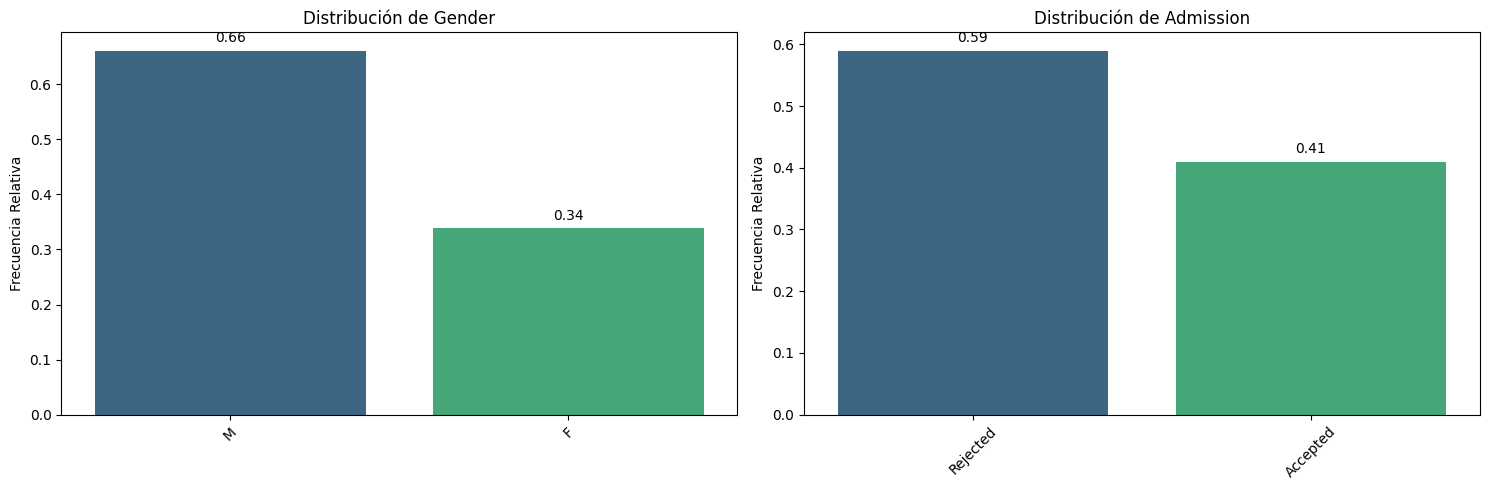


 ------------- 
 Relación de variables


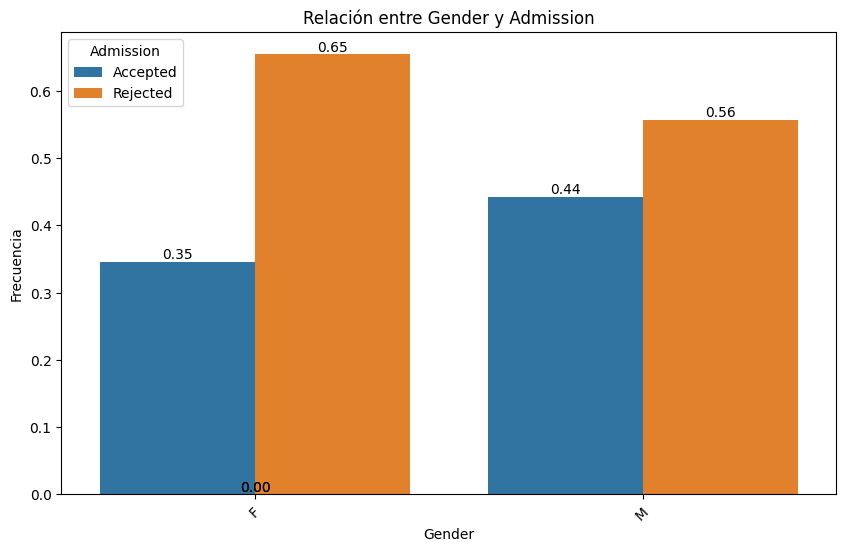


 ------------- 
 Tabla de contingencia


Admission,Accepted,Rejected
Gender,,
F,1494,2827
M,3738,4704



 ------------- 
 Test Chi-2
Valor Chi-Cuadrado: 110.84892145390278
P-Value: 6.385628329926473e-26
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[1771.32899788 2549.67100212]
 [3460.67100212 4981.32899788]]


In [16]:
# Primero ver sus frecuencias individuales
print('Frecuencias individuales')
viz.pinta_distribucion_categoricas(admisiones, ['Gender', 'Admission'], relativa=True)

# Segundo recordar su relación
print('\n ------------- \n', 'Relación de variables')
viz.plot_categorical_relationship_fin(admisiones, "Gender", "Admission", relative_freq=True)

# Obtener la tabla de contingencia
print('\n ------------- \n', 'Tabla de contingencia')
tabla_contingencia = pd.crosstab(admisiones['Gender'], admisiones['Admission'])
display(tabla_contingencia)

# Test Chi-2
print('\n ------------- \n', 'Test Chi-2')
chi2, p, dof, expected = scipy.stats.chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Misma conclusión que antes

- La hipótesis nula (o de partida) de chi-2 es la independencia de las variables. “p” próximos a 0 indica que podemos rechazar la hipótesis.
- Por tanto, como ya intuiamos, Gender y Admission SÍ están relacionadas.

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [21]:
# Cargar fichero
tips = pd.read_csv('./data/tips.csv',
                         index_col=0)
display(tips)

# Información numérica
display(tips.describe())

# Distinguir las clases de grupo
display(ds.get_cardinality_class(tips, 10, 20))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,Card,%_Card,Tipo,Clase
total_bill,229,93.852459,float64,Numérica Continua
tip,123,50.409836,float64,Numérica Continua
sex,2,0.819672,object,Binaria
smoker,2,0.819672,object,Binaria
day,4,1.639344,object,Categórica
time,2,0.819672,object,Binaria
size,6,2.459016,int64,Categórica


### Ejercicio 5

Comprueba si la hipótesis "No existe una relación entre la propina dejada y el sexo del cliente" tiene confirmación estadística significativa. Para ello emplea el test que creas conveniente a la relación entre las variables "tip" y "sex"(recuerda que aquí disponemos de tres test: t-student, prueba U de Mann-Whitney u el análisis ANOVA).

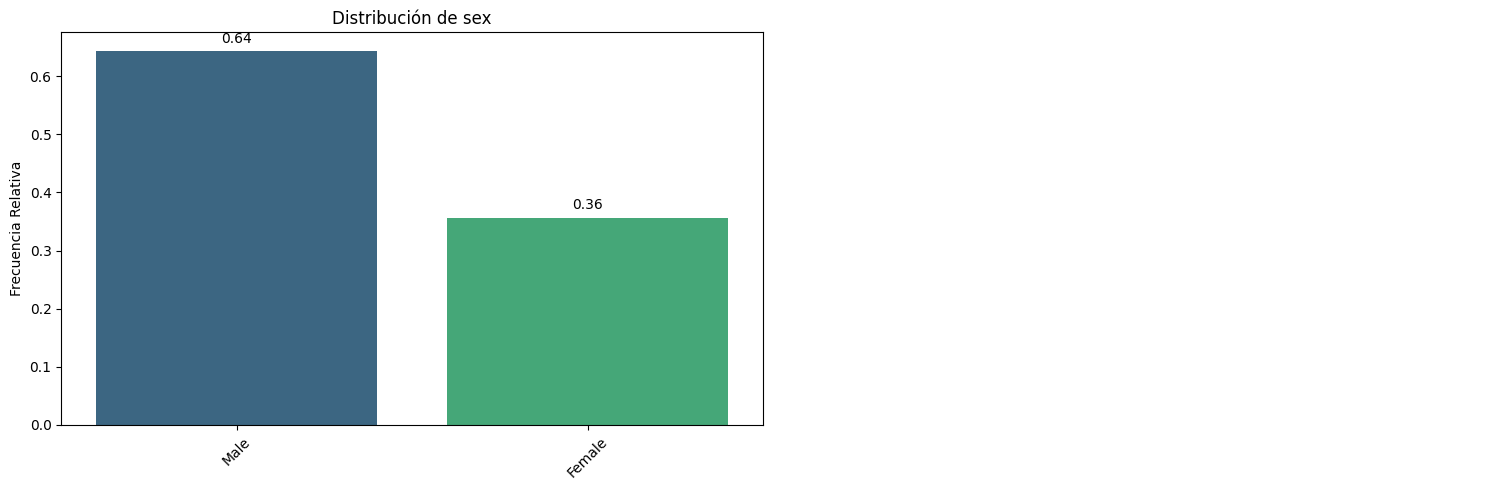

(2,)


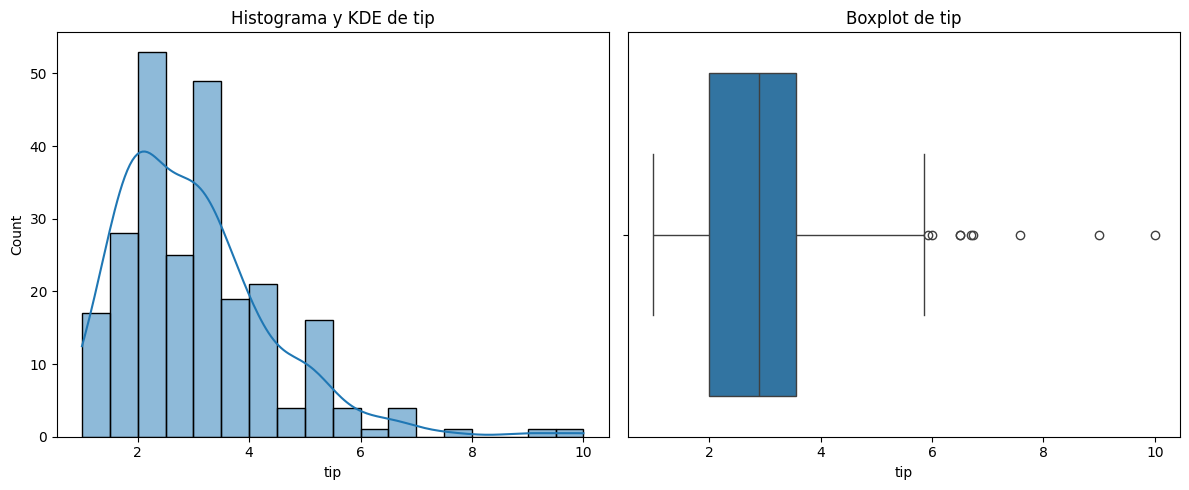

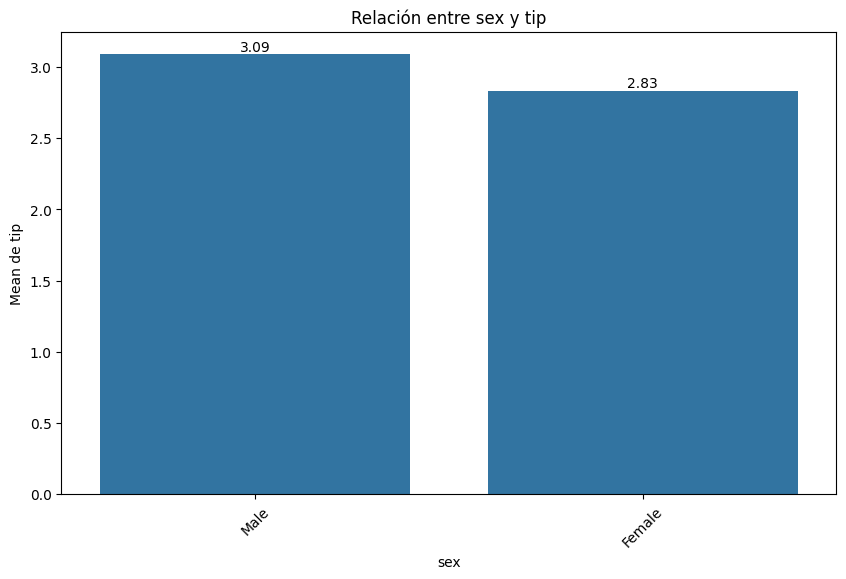

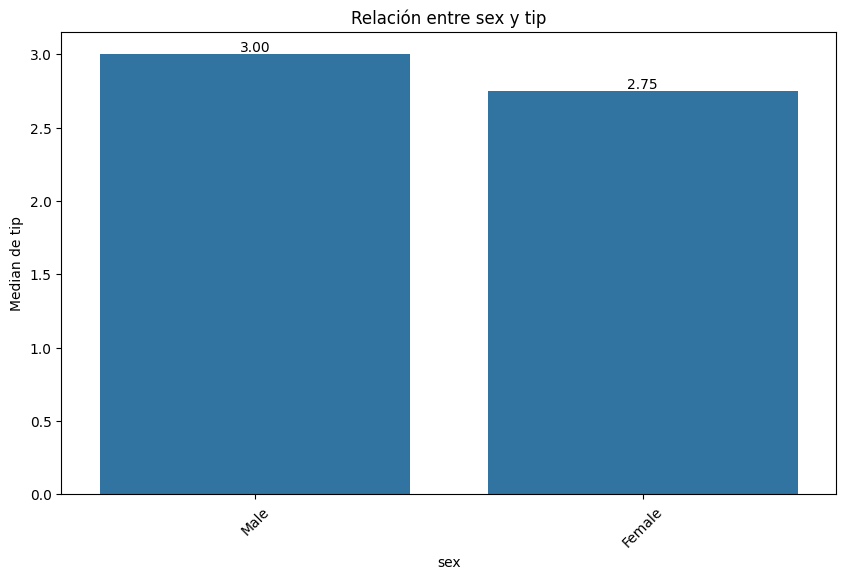

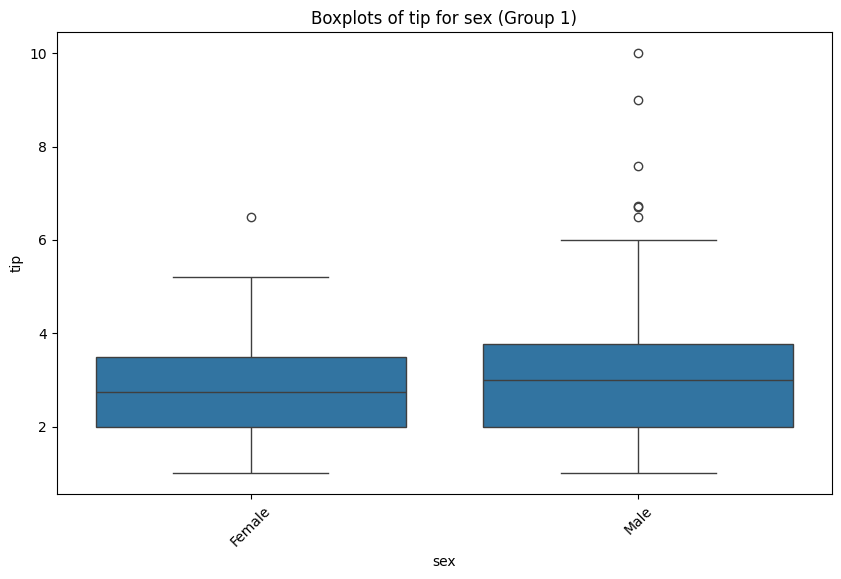

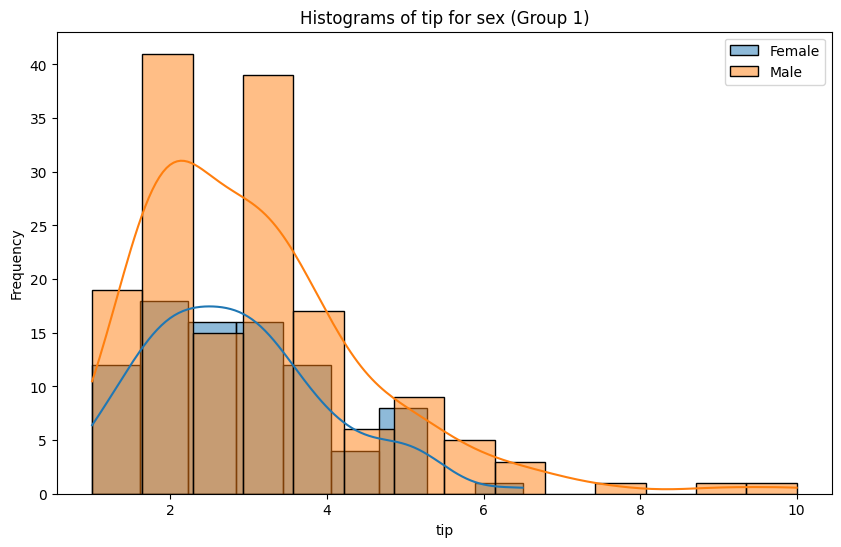

In [24]:
# "tip" y "sex" son variales numérica continua y categórica binaria respectivamente

# Primero veamos la frecuencia relativa de "sex"
viz.pinta_distribucion_categoricas(tips, ["sex"], relativa= True)

# Y el histograma, KDE y plot-box de "tip"
viz.plot_combined_graphs(tips, ["tip"])     # ya adelanto que no es una distribución normal

# Relación entre variables con la media y la mediana
viz.plot_categorical_numerical_relationship(tips, "sex", "tip", measure = "mean")
viz.plot_categorical_numerical_relationship(tips, "sex", "tip", measure = "median")

# Comparar diagramas de cajas
viz.plot_grouped_boxplots(tips, "sex", "tip")

# Comparar histogramas
viz.plot_grouped_histograms(tips, "sex", "tip", 2)

- Como no tienen una distribución normal, voy a usar el U de Mann. Esto se puede porque la variable es `binaria.`

In [26]:
# Aplicar la prueba U de Mann-Whitney

# 1. Separar los datos en dos grupos según la variable categórica
grupo_a = tips.loc[tips.sex == "Male"]["tip"]
grupo_b = tips.loc[tips.sex == "Female"]["tip"]

# 2. Aplicar la prueba y mostrar resultados
u_stat, p_valor = scipy.stats.mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 7289.5
Valor p: 0.38335449359363927


- La hipótesis nula (o directora) es que NO hay diferencia estadística significativa entre las medianas de los valores. Si hubieramos obtenido un p-value por debajo de 0.05, hubieramos rechado la hipótesis nula y habríamos dicho que hay confianza estadística en que las medianas de cada grupo son diferentes para cada valor y que hay una relación entre los valores de la categórica y los de la numérica.
- Como no es el caso no podemos rechazar la hipótesis. Es decir no podemos decir que haya esa relación entre las dos variables.
- Según este test, no podemos asegurar que la propina y el sexo tengan relación. Lo que reafirma nuestra confirmación visual, pero no confirma. 

### Ejercicio 6

Repite el ejercicio anterior para "tip" y "size" considerando esta última como "categórica". Haz el analisis bivariante visual previo.

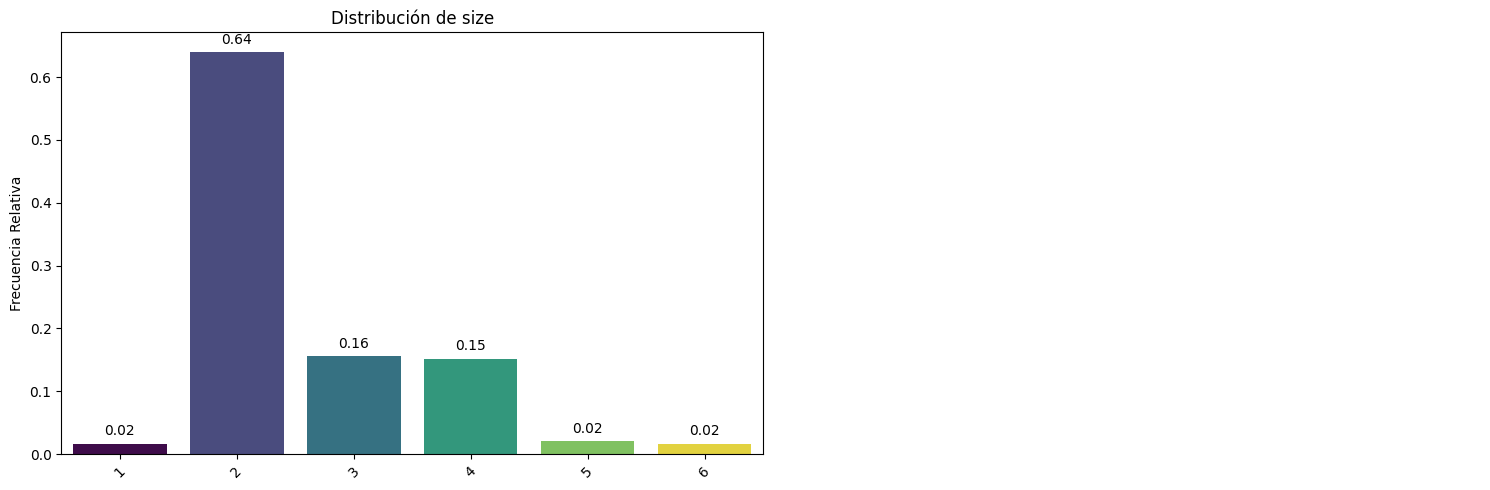

(2,)


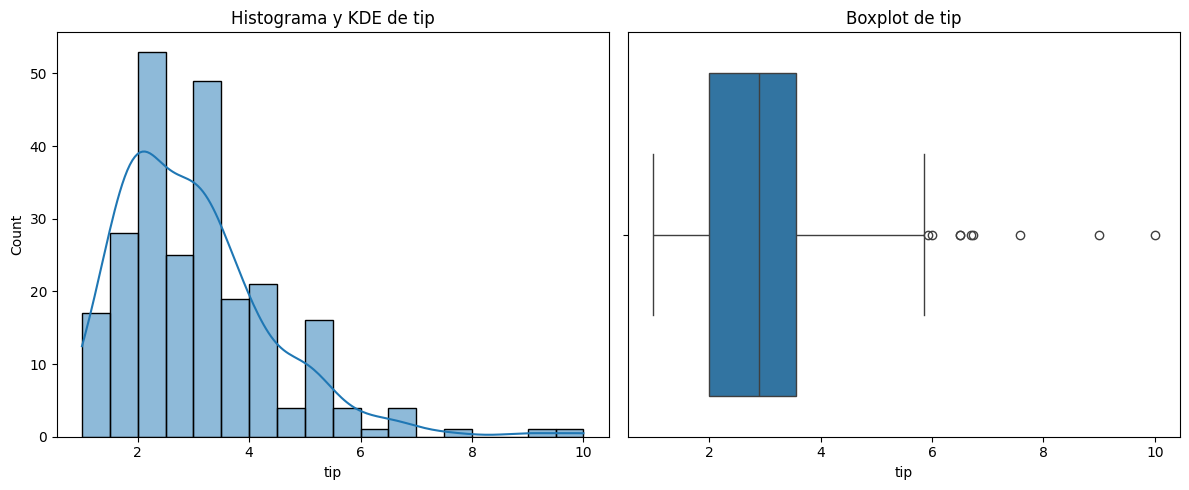

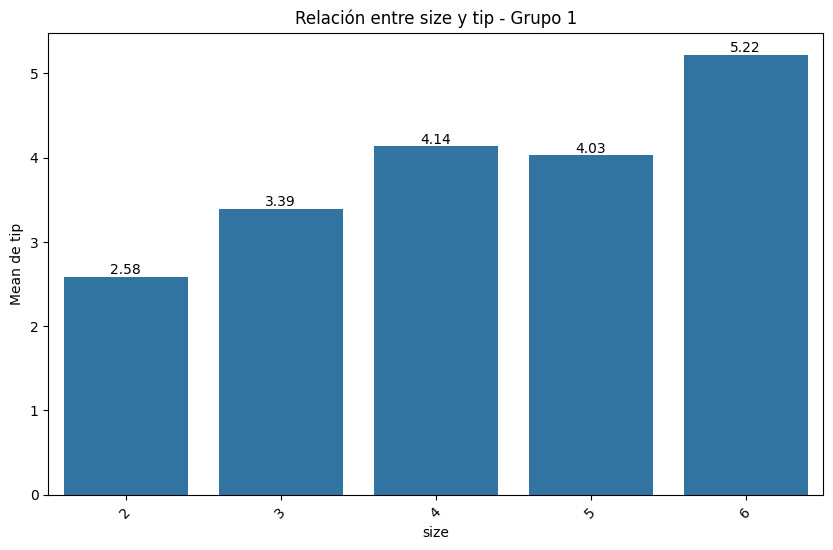

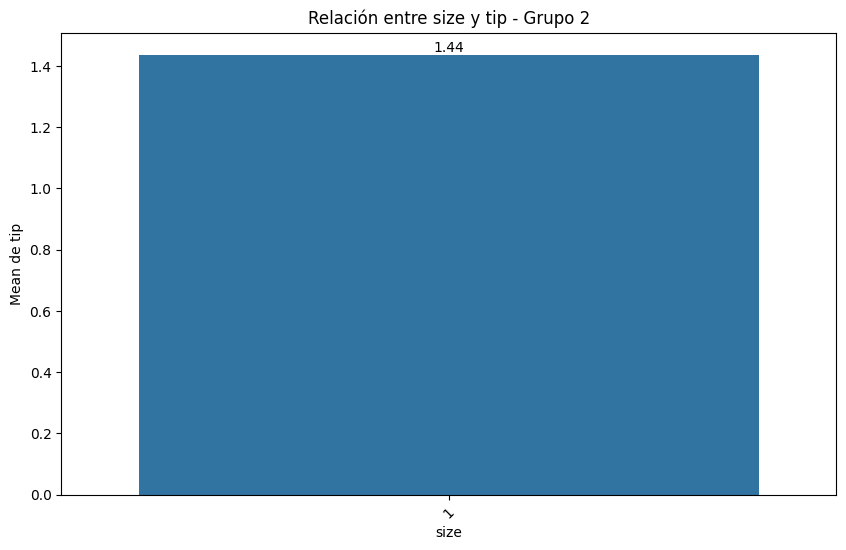

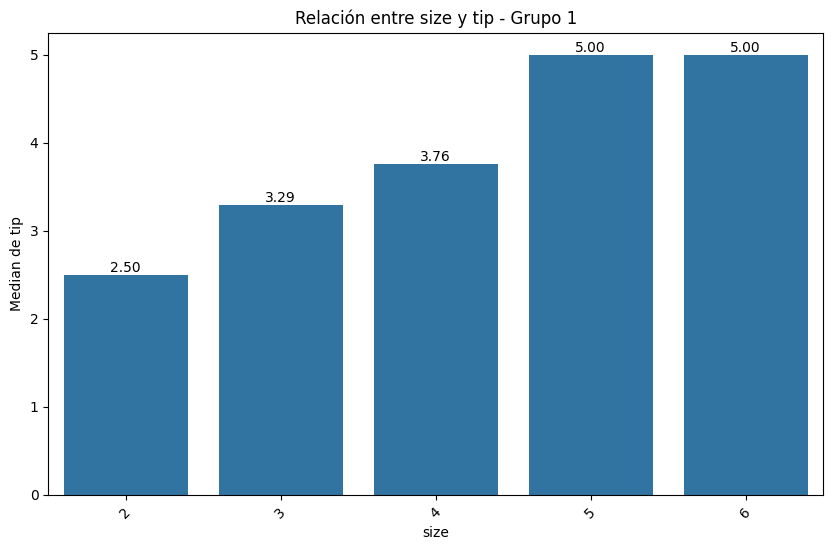

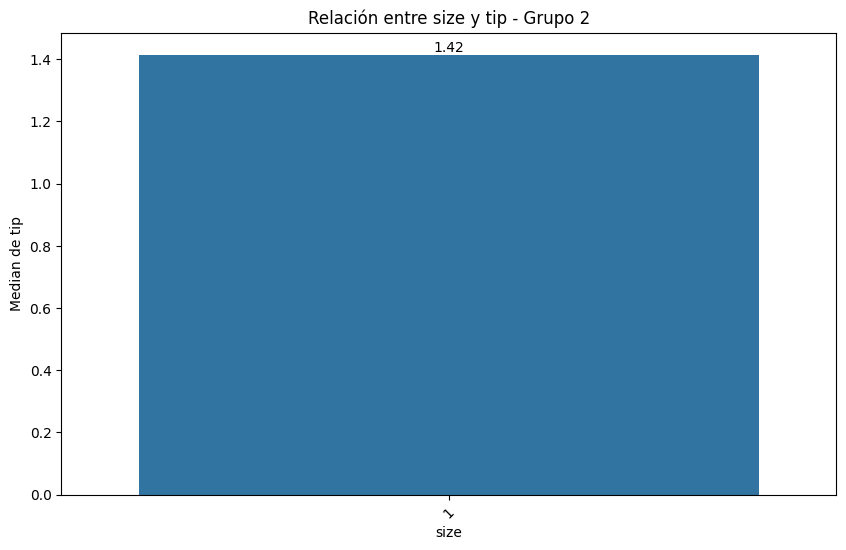

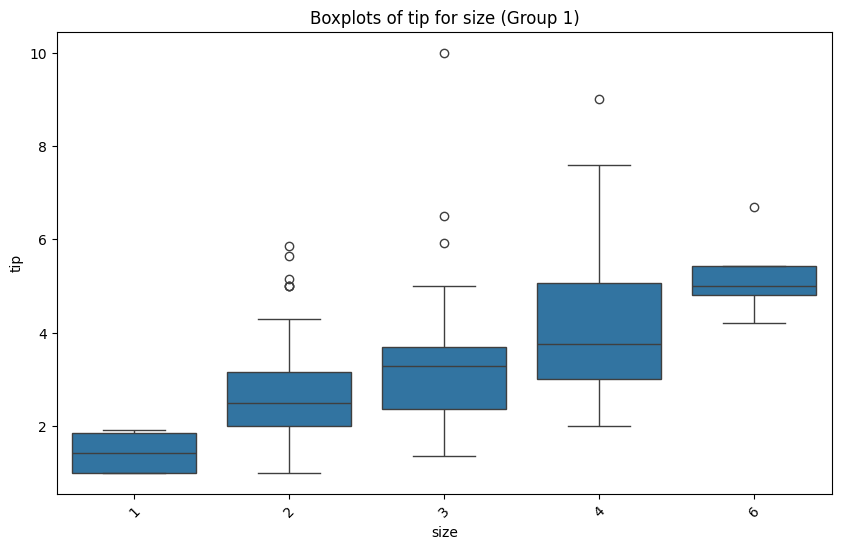

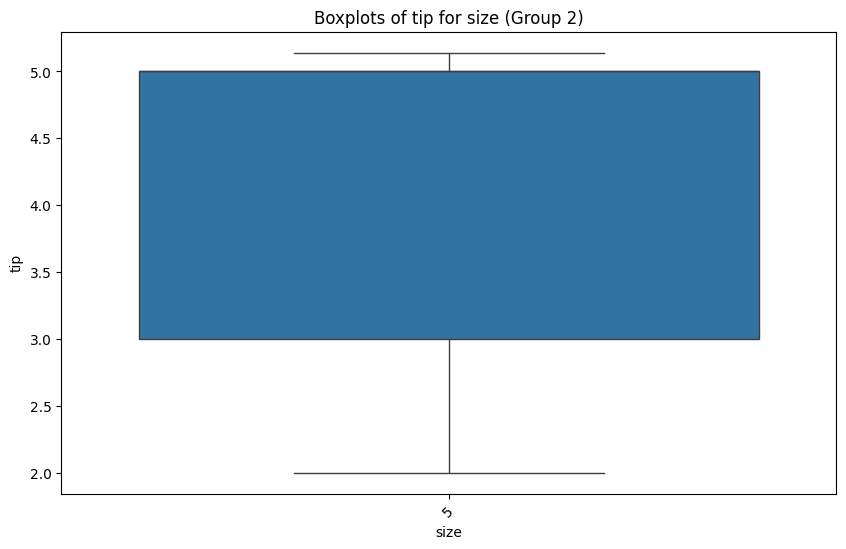

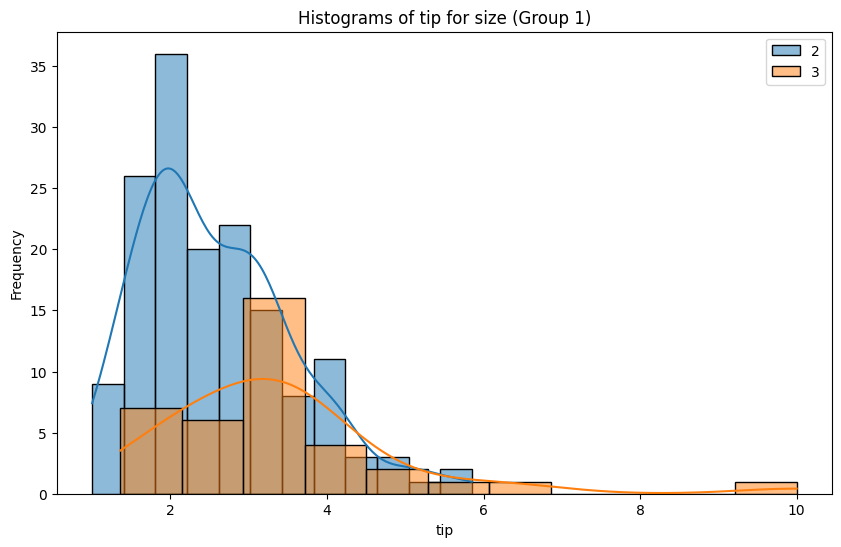

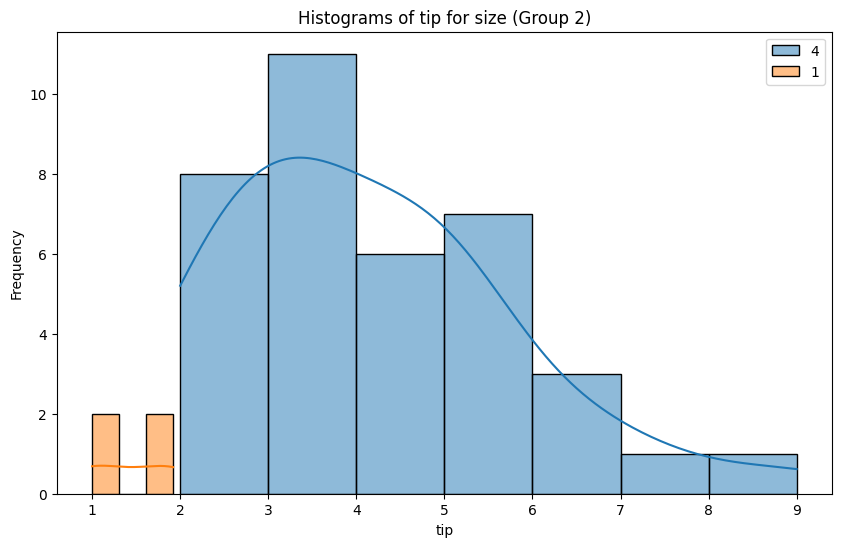

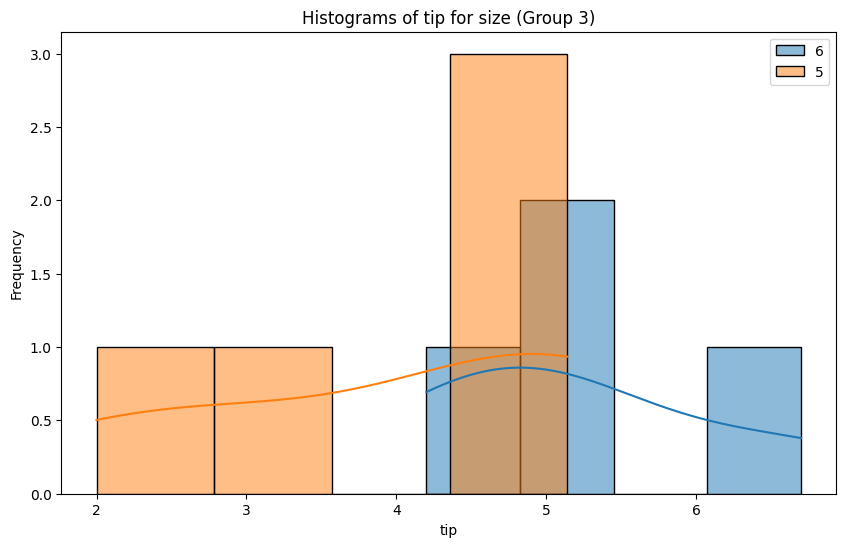

In [27]:
# "tip" y "size" son variales numérica continua y categórica respectivamente

# Primero veamos la frecuencia relativa de "size"
viz.pinta_distribucion_categoricas(tips, ["size"], relativa= True)

# Y el histograma, KDE y plot-box de "tip"
viz.plot_combined_graphs(tips, ["tip"])     # ya adelanto que no es una distribución normal

# Relación entre variables con la media y la mediana
viz.plot_categorical_numerical_relationship(tips, "size", "tip", measure = "mean")
viz.plot_categorical_numerical_relationship(tips, "size", "tip", measure = "median")

# Comparar diagramas de cajas
viz.plot_grouped_boxplots(tips, "size", "tip")

# Comparar histogramas
viz.plot_grouped_histograms(tips, "size", "tip", 2)

- En este caso la variable categórica no es binaria y no podemos usar la prueba U. Para estos casos empleamos el método ANOVA.

In [37]:
# Test ANOVA

# Separar en grupos según los valores de las categorías
grupos = tips['size'].unique()  # Obtener los valores únicos de la columna categórica, en este caso el tamaño de la mesa
propina = [tips[tips['size'] == grupo]['tip'] for grupo in grupos] # obtenemos las propinas por tamaño de mesa y los incluimos en una lista
# print(propina)

# Aplicamos el test ANOVA
# El método *, lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
f_val, p_val = scipy.stats.f_oneway(*propina) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.746330672727057
Valor p: 2.1694633916208874e-13


- En este caso la hipótesis nula es que las distribuciones de valores para cada tamaño de mesa NO tienen relación estadística, pero ahora como el p-value es menor que 0.05, rechazamos la hipótesis nula y reafirmamos la alternativa o contraria.
- Es decir que SÍ, que las propinas no se parecen para cada tamaño de mesa y que podemos extrapolar ese valor a otros tamaños de mesa con un conjunto de datos similares.

### Ejercicio 7

Considera ahora "size" como numérica, muestra el diagrama de dispersión con correlación entre "size" y "tip" y luego aplicales el test para saber si el coeficiente de pearson es estadísticamente significativo. ¿Qué más observas?

(2,)


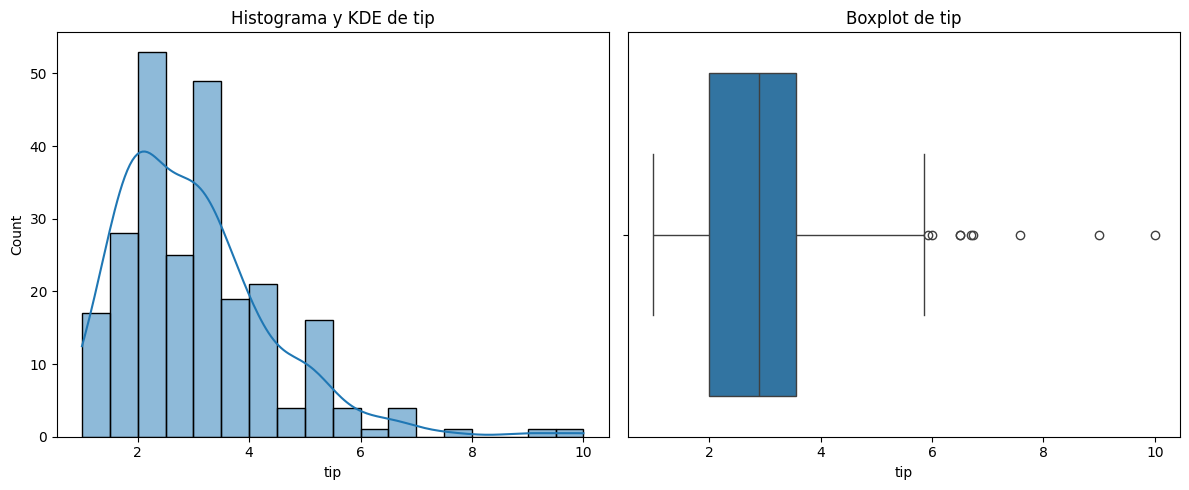

(2,)


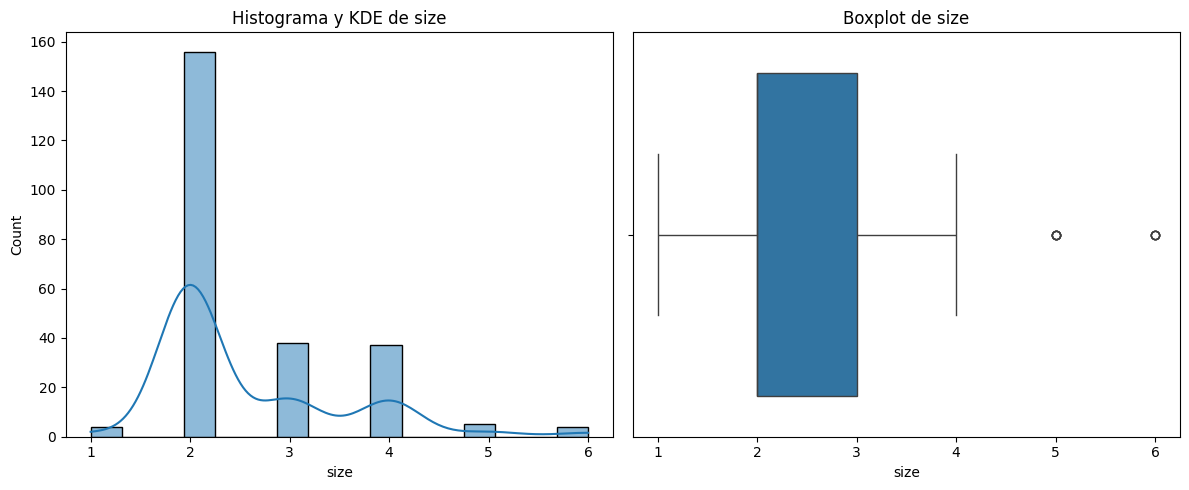

,tip,size
count,244.000000,244.000000
mean,2.998279,2.569672
std,1.383638,0.951100
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.900000,2.000000
75%,3.562500,3.000000
max,10.000000,6.000000


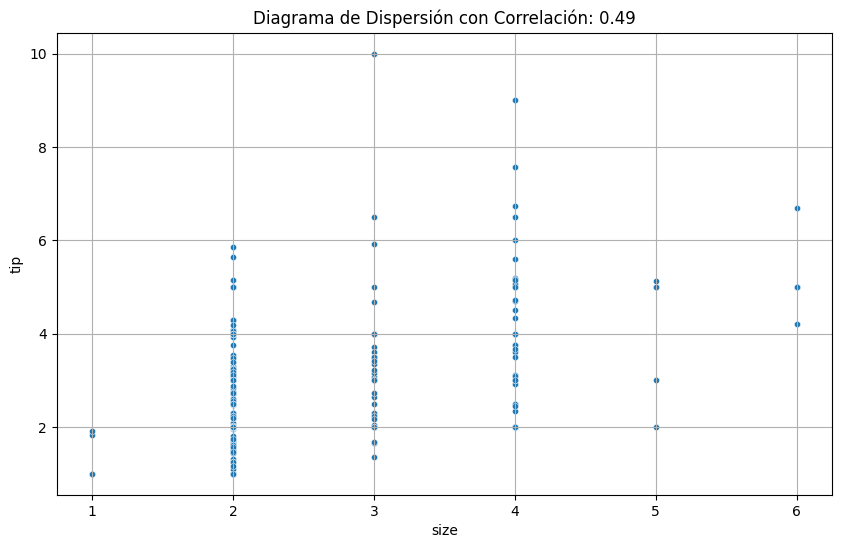

,size,tip
size,1.000000,0.489299
tip,0.489299,1.000000


PearsonRResult(statistic=0.4892987752303571, pvalue=4.300543327225138e-16)

In [46]:
# Consideramos ahora que "size" también es numérica

# Vemos la distribución de ambas
viz.plot_combined_graphs(tips, ["tip"]) 
viz.plot_combined_graphs(tips, ["size"]) 

# Mostrar una comparación numérica
display(tips[['tip', 'size']].describe())

# Diagrama de dispersión
viz.grafico_dispersion_con_correlacion(tips,"size","tip", 20)  # Muestra por defecto la correlación

# Cálculo de correlación con pandas
display(tips[["size","tip"]].corr())     # --> r = Coef correlación Pearson = 0.48

# Con la libreria scipy
display(scipy.stats.pearsonr(tips["size"], tips["tip"], alternative='two-sided'))

- El coeficiente de Pearson (r), que toma valores entre -1 y 1, indica cierta correlación lineal positiva, porque tiene un valor de 0.48.
- La hipótesis nula de que están correlados se confirma porque p-value << 0.05.